<a href="https://colab.research.google.com/github/urvi1703/ML-PROJECT/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [ ]:
df_movie=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Datasets/Movie dataset.csv',encoding = "ISO-8859-1")
df_movie.dropna(inplace=True)
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df_movie.shape

(5659, 10)

In [ ]:
df_movie.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [ ]:
df_movie.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [ ]:
df_movie.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15493,False,False,False,False,False,False,False,False,False,False
15494,False,False,False,False,False,False,False,False,False,False
15503,False,False,False,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False


<Axes: >

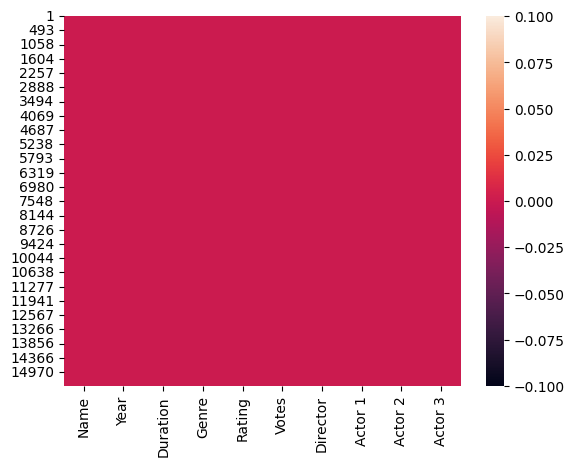

In [ ]:
sns.heatmap(df_movie.isnull())

In [ ]:
df_movie.dropna(axis=0)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
dup_df=df_movie.duplicated().any()
print("Any Duplicated movies?",dup_df)

Any Duplicated movies? False


In [ ]:
df_movie.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659.000000,5659,5659,5659,5659,5659
unique,5385,91,174,376,NaN,2027,2431,1960,2321,2556
top,Baazi,(2019),120 min,Drama,NaN,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,NaN,90,41,104,52,57
mean,NaN,NaN,NaN,NaN,5.898533,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381165,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df_movie[df_movie['Rating'] >= 6]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
15,102 Not Out,(2018),102 min,"Comedy, Drama",7.4,"6,619",Umesh Shukla,Amitabh Bachchan,Rishi Kapoor,Vijay Raaz
...,...,...,...,...,...,...,...,...,...,...
15476,Zindagi Na Milegi Dobara,(2011),155 min,"Comedy, Drama",8.2,"70,344",Zoya Akhtar,Hrithik Roshan,Farhan Akhtar,Abhay Deol
15479,Zindagi Tumse,(2019),120 min,Family,6.0,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee


In [ ]:
df_movie[df_movie['Rating'] >= 6]['Name']

1        #Gadhvi (He thought he was Gandhi)
6                                 ...Yahaan
10                1:1.6 An Ode to Lost Love
12                                 100 Days
15                              102 Not Out
                        ...                
15476              Zindagi Na Milegi Dobara
15479                         Zindagi Tumse
15493                                Zubaan
15494                              Zubeidaa
15508                          Zulm-O-Sitam
Name: Name, Length: 3027, dtype: object

In [ ]:
df_movie.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
(1952)    7.212500
(1957)    7.080645
(1944)    7.075000
(1940)    7.050000
(1953)    6.955000
            ...   
(1995)    5.310937
(2002)    5.281111
(2003)    5.258772
(2000)    5.178313
(2004)    5.044954
Name: Rating, Length: 91, dtype: float64

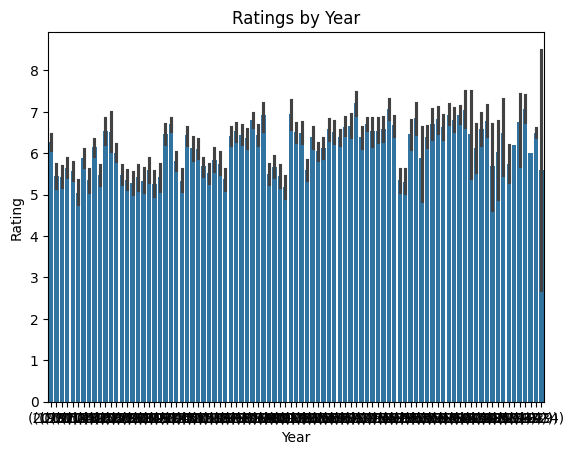

In [ ]:
sns.barplot(x='Year',y='Rating',data=df_movie)
plt.title("Ratings by Year")
plt.show()

In [ ]:
df_movie.groupby('Director')['Rating'].mean()

Director
A. Bhimsingh      6.785714
A. Jagannathan    5.833333
A. Majid          5.700000
A. Muthu          3.000000
A. Salaam         5.575000
                    ...   
Zia Sarhadi       6.366667
Ziaullah Khan     5.600000
Zoya Akhtar       6.800000
Zubair Khan       5.400000
Zunaid Memon      6.400000
Name: Rating, Length: 2431, dtype: float64

In [ ]:
df_movie.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Saif Ali Sayeed     10.0
Sriram Raja          9.7
Munni Pankaj         9.4
Suhrud Godbole       9.4
Arvind Pratap        9.4
                    ... 
Navin Batra          1.9
Raajeev Walia        1.8
Stanley D'Costa      1.8
Pramod Mandloi       1.7
Sachindra Sharma     1.6
Name: Rating, Length: 2431, dtype: float64

In [ ]:
df_movie['Year'].value_counts()

Year
(2019)    227
(2017)    211
(2018)    202
(2015)    177
(2016)    173
         ... 
(1931)      2
(1939)      2
(1934)      2
(1933)      1
(1932)      1
Name: count, Length: 91, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

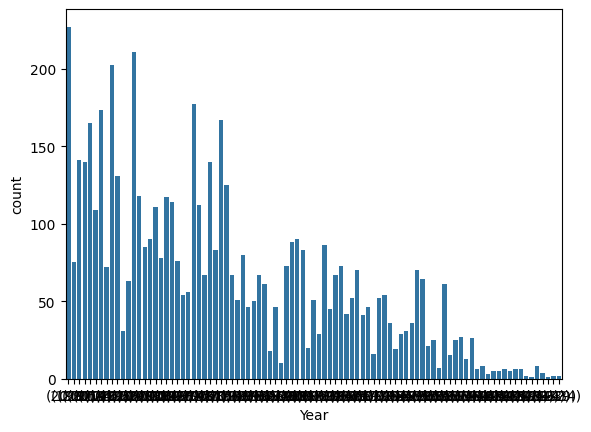

In [ ]:
sns.countplot(x='Year',data=df_movie)

In [ ]:
def rating(Rating):
  if Rating>=7.0:
    return "Excellent"
  elif Rating >=6.0:
    return "Good"
  else:
    return "Average"

In [ ]:
df_movie['Genre'].dtype

dtype('O')

In [ ]:
movies = df_movie.groupby('Name').size().sort_values(ascending=True)[:1000]
print(movies)

Name
#Gadhvi (He thought he was Gandhi)    1
Noorie                                1
Noor                                  1
Noise of Silence                      1
Noblemen                              1
                                     ..
Mera Dil Tere Liye                    1
Mera Rakshak                          1
Mera Desh Mera Dharam                 1
Men Not Allowed                       1
Memsaab                               1
Length: 1000, dtype: int64


In [ ]:
groupedby_movieName = df_movie.groupby('Name')
groupedby_rating = df_movie.groupby('Rating')
groupedby_votes = df_movie.groupby('Votes')

In [ ]:
plt.figure(figsize=(10,10))
plt.show()

<Figure size 1000x1000 with 0 Axes>

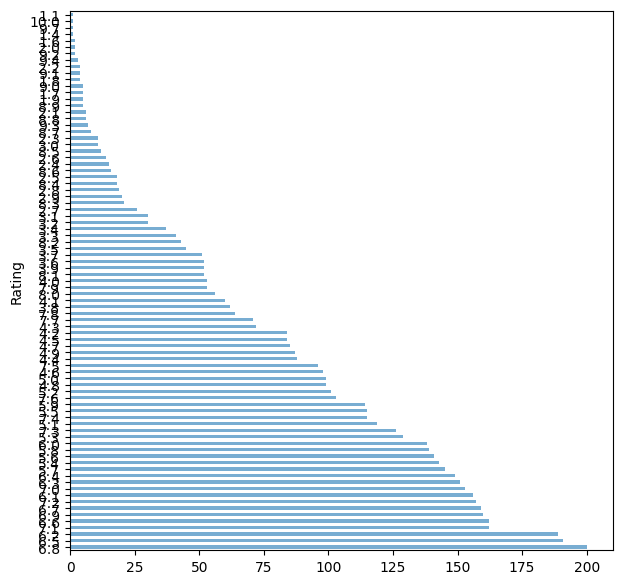

In [ ]:
top_25 = df_movie[25:]
top_25['Rating'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

In [ ]:
first_500 = df_movie[500:]
first_500.dropna(inplace=True)

<ipython-input-43-72e441055f12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_500.dropna(inplace=True)


In [ ]:
labels = first_500[['Rating']].values